In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import spicy.stats as sts
income_df = pd.read_csv("household_median_income_2017.csv")
income_df = income_df.dropna(how='any')

#excluting Nebraska & United States rows to match the Zillow df. Puerto Rico was not in csv file. 
income_df = income_df.loc[income_df['State']!= 'Nebraska']
income_df = income_df.loc[income_df['State']!= 'United States'].reset_index(drop=True)
income_df = income_df[['State','2017', '2016', '2015']].sort_values('2017',ascending = False)

#removing commas & converting to int data type 
income_df["2017"] = income_df["2017"].str.replace(",","").astype(int)
income_df["2016"] = income_df["2016"].str.replace(",","").astype(int)
income_df["2015"] = income_df["2015"].str.replace(",","").astype(int)
income_df.reset_index(drop=True).head()

sort_2017 = income_df.sort_values('2017', ascending=False).drop(columns=['2016', '2015'])
sort_2016 = income_df.sort_values('2016', ascending=False).drop(columns=['2015', '2017'])
sort_2015 = income_df.sort_values('2015', ascending=False).drop(columns=['2016', '2017'])



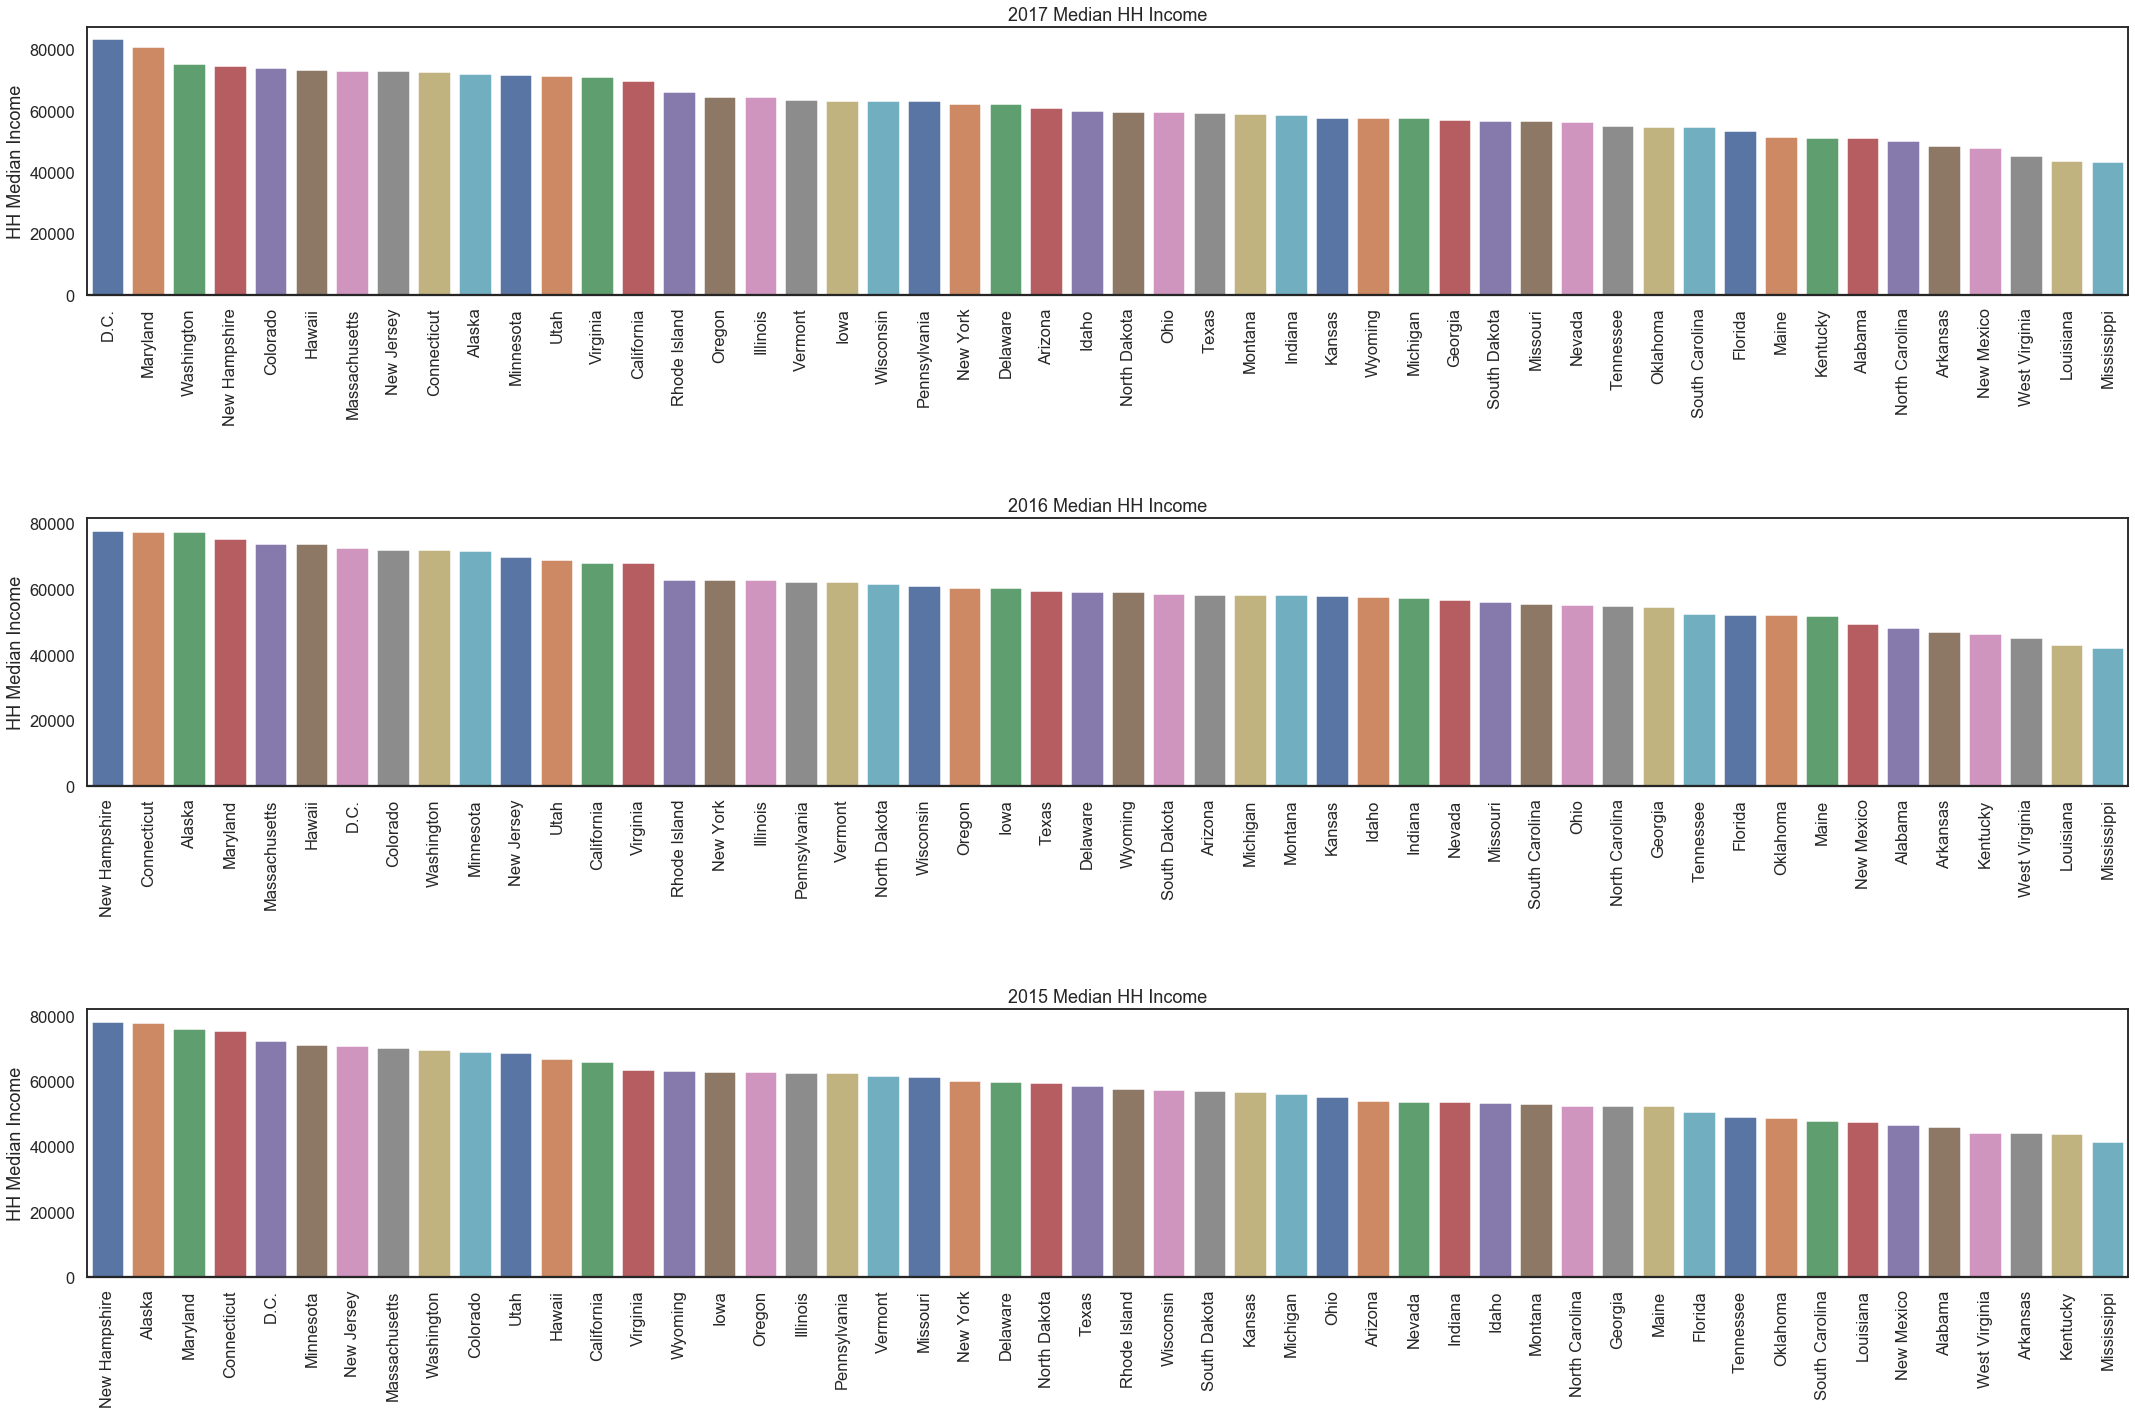

<Figure size 432x288 with 0 Axes>

In [18]:
sns.set(style="white", context="talk")

f, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(30,20))
x1= [x for x in sort_2017['State']]
x2= [x for x in sort_2016['State']]
x3= [x for x in sort_2015['State']]

y1 = [state for state in sort_2017['2017']]
y2 = [state for state in sort_2016['2016']]
y3 = [state for state in sort_2015['2015']]


sns.barplot(x=x1, y=y1, palette="deep", ax=ax1)
ax1.axhline(0, color='k', clip_on=False)
ax1.set_ylabel("HH Median Income")
ax1.set_title("2017 Median HH Income")
ax1.set_xticklabels(x1, rotation=90)

sns.barplot(x=x2, y=y2, palette="deep", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("HH Median Income")
ax2.set_title("2016 Median HH Income")
ax2.set_xticklabels(x2, rotation=90)

sns.barplot(x=x3, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("HH Median Income")
ax3.set_title("2015 Median HH Income")
ax3.set_xticklabels(x3, rotation=90)


plt.tight_layout(h_pad=4)

plt.show()

#save figure as a png
plt.savefig("output_data/2017_2015_Median_HH_Income.png")
plt.show()

In [19]:
#2015 - Highest / Lowest Median HH Income 
income_2015= income_df.sort_values('2015', ascending = False)
income_2015 = income_2015.drop(columns =['2016', '2017']).reset_index(drop=True)
highest_income_2015 = income_2015.iloc[0:3,0:2]
lowest_income_2015 = income_2015.iloc[-3:,0:2]

#2016 - Highest / Lowest Median HH Income 
income_2016= income_df.sort_values('2016', ascending = False)
income_2016 = income_2016.drop(columns =['2015', '2017']).reset_index(drop=True)
highest_income_2016 = income_2016.iloc[0:3,0:2]
lowest_income_2016 = income_2016.iloc[-3:,0:2]

#2017 - Highest / Lowest Median HH Income 
income_2017= income_df.sort_values('2017', ascending = False)
income_2017 = income_2017.drop(columns =['2015', '2016']).reset_index(drop=True)
highest_income_2017 = income_2017.iloc[0:3,0:2]

lowest_income_2017 = income_2017.iloc[-3:,0:2]


In [20]:
highest_income_2015

,State,2015
0,New Hampshire,78299
1,Alaska,77717
2,Maryland,76146


In [21]:
lowest_income_2015

,State,2015
47,Arkansas,44282
48,Kentucky,43857
49,Mississippi,41426


In [22]:
highest_income_2016

,State,2016
0,New Hampshire,77900
1,Connecticut,77556
2,Alaska,77351


In [23]:
lowest_income_2016

,State,2016
47,West Virginia,45308
48,Louisiana,43103
49,Mississippi,41983


In [24]:
highest_income_2017

,State,2017
0,D.C.,83382
1,Maryland,81084
2,Washington,75418


In [25]:
lowest_income_2017

,State,2017
47,West Virginia,45392
48,Louisiana,43903
49,Mississippi,43441


In [26]:
income_df['17 vs. 16'] = income_df['2017'] - income_df['2016']
income_df['16 vs. 15'] = income_df['2016'] - income_df['2015']
income_df = income_df.reset_index(drop=True)
income_df.head()

,State,2017,2016,2015,17 vs. 16,16 vs. 15
0,D.C.,83382,72508,72501,10874,7
1,Maryland,81084,75346,76146,5738,-800
2,Washington,75418,71822,69575,3596,2247
3,New Hampshire,74801,77900,78299,-3099,-399
4,Colorado,74172,72084,68906,2088,3178


In [70]:
sorted_17_16Change = income_df.sort_values('17 vs. 16',ascending=False).drop(columns = ['2015','16 vs. 15']).reset_index(drop=True)
sorted_16_15Change = income_df.sort_values('16 vs. 15',ascending=False).reset_index(drop=True).drop(columns = ['2017','17 vs. 16'])
sorted_16_15Change

,State,2016,2015,16 vs. 15
0,South Carolina,55505,47968,7537
1,Hawaii,73684,66751,6933
2,Rhode Island,62851,57633,5218
3,Montana,58302,53177,5125
4,Idaho,57780,53414,4366
5,Arizona,58328,54060,4268
6,Virginia,67880,63618,4262
7,Wisconsin,61103,57347,3756
8,Massachusetts,73820,70214,3606
9,Indiana,57300,53786,3514


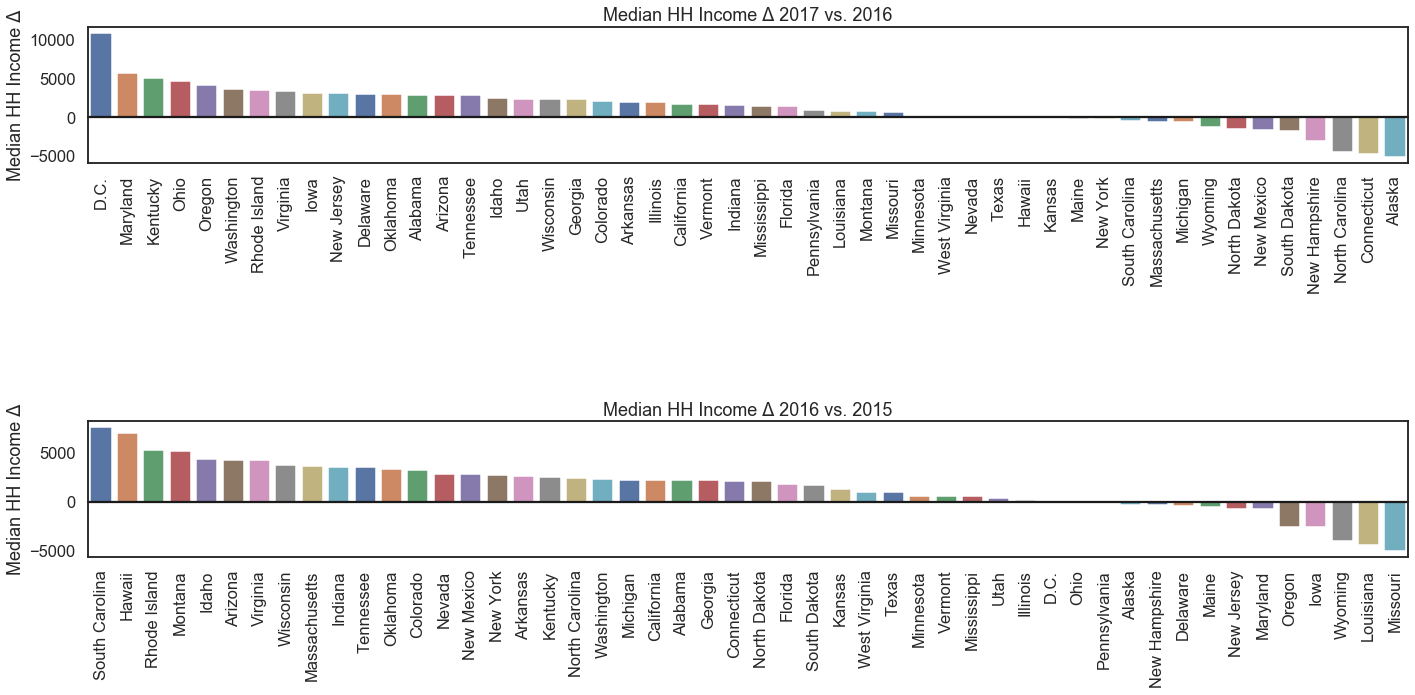

<Figure size 432x288 with 0 Axes>

In [28]:
sns.set(style="white", context="talk")

f, (ax1, ax2) = plt.subplots(2,1, figsize=(20,10),sharex = False)
x1= [x for x in sorted_17_16Change['State']]
x2= [x for x in sorted_16_15Change['State']]

y1 = [state for state in sorted_17_16Change['17 vs. 16']]
y2 = [state for state in sorted_16_15Change['16 vs. 15']]


sns.barplot(x=x1, y=y1, palette="deep", ax=ax1)
ax1.axhline(0, color='k', clip_on=False)
ax1.set_ylabel('Median HH Income Δ')
ax1.set_title('Median HH Income Δ 2017 vs. 2016')
ax1.set_xticklabels(x1, rotation=90)

sns.barplot(x=x2, y=y2, palette="deep", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel('Median HH Income Δ')
ax2.set_title('Median HH Income Δ 2016 vs. 2015')
ax2.set_xticklabels(x2, rotation=90)


plt.tight_layout(h_pad=6)


#plt.setp(xticks=(rotation=90))

plt.show()

#save figure as a png
plt.savefig("output_data/2017_2015_Median_HH_Income_Change.png")
plt.show()

In [73]:
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource,
                          CustomJS, CustomJSFilter, 
                          GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure
import geopandas as gpd


contiguous_usa = gpd.read_file('cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
contiguous_usa.columns = ['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'State', 'LSAD',
       'ALAND', 'AWATER', 'geometry']
contiguous_usa.head()

change_2017 = pd.merge(contiguous_usa, sorted_17_16Change, on="State", suffixes=("_shape", ""))
change_2017 = change_2017.loc[~change_2017['State'].isin(['Nebraska','Hawaii', 'Alaska'])]
change_2017

geosource_2017 = GeoJSONDataSource(geojson = change_2017.to_json())

## Plot change in median hh income 2016 to 2017
# Define color palettes
palette = brewer['BuPu'][9]
palette = palette[::-1] # reverse order of colors so higher values have darker colors
# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = -5500, high = 11000) #make sure you set the low and high, if you forget it won't map
# Define custom tick labels for color bar.
tick_labels = {'-5500': '-5500', '-3667': '-3667',
 '-1834':'-1834', '0':'0',
 '1833':'1833', '3666':'3666',
 '5499':'5499', '7332':'7332',
 '9165':'9165','11000':'11000+'}

# Create color bar.
color_bar = ColorBar(color_mapper = color_mapper, 
                     label_standoff = 8,
                     width = 300, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = 'horizontal',
                     major_label_overrides = tick_labels)

# Create figure object.
p_2017 = figure(title = 'Change in Median HH Income, 2016 to 2017', 
           plot_height = 600, plot_width = 950, 
           toolbar_location = 'below',
           tools = "pan, wheel_zoom, box_zoom, reset")
p_2017.xgrid.grid_line_color = None
p_2017.ygrid.grid_line_color = None
# Add patch renderer to figure.
states = p_2017.patches('xs','ys', source = geosource_2017, #your geojson file
                   fill_color = {'field' :'17 vs. 16',
                                 'transform' : color_mapper},
                   line_color = 'gray', 
                   line_width = 0.25, 
                   fill_alpha = 1)

# Create hover tool
p_2017.add_tools(HoverTool(renderers = [states],
                      tooltips = [('State','@State'),
                               ('Income Change','@{17 vs. 16}{int}')])) #if you add {int} then it writes as integer, otherwise scientific notation
                                                                #the @ shows the column name, so here I am saying "in hover box show "Median Rent: [value in 'Value' column]{in integer format}
# Specify layout
p_2017.add_layout(color_bar, 'below')

show(p_2017)


In [72]:
change_2016 = pd.merge(contiguous_usa, sorted_16_15Change, on="State", suffixes=("_shape", ""))
change_2016 = change_2016.loc[~change_2016['State'].isin(['Nebraska','Hawaii', 'Alaska'])]
change_2016

geosource_2016 = GeoJSONDataSource(geojson = change_2016.to_json())

## Plot change in median hh income 2016 to 2017
# Define color palettes
palette = brewer['BuPu'][9]
palette = palette[::-1] # reverse order of colors so higher values have darker colors
# Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors.
color_mapper = LinearColorMapper(palette = palette, low = -5100, high = 7600) #make sure you set the low and high, if you forget it won't map
# Define custom tick labels for color bar.
tick_labels = {'-5100': '-5100', '-3689': '-3689',
 '-2278':'-2278', '-867':'-867',
 '544':'544', '1955':'1955',
 '3366':'3366', '4777':'4777',
 '6188':'6188','7600':'7600+'}

# Create color bar.
color_bar = ColorBar(color_mapper = color_mapper, 
                     label_standoff = 8,
                     width = 300, height = 20,
                     border_line_color = None,
                     location = (0,0), 
                     orientation = 'horizontal',
                     major_label_overrides = tick_labels)

# Create figure object.
p_2016 = figure(title = 'Change in Median HH Income, 2015 to 2016', 
           plot_height = 600, plot_width = 1000, 
           toolbar_location = 'below',
           tools = "pan, wheel_zoom, box_zoom, reset")
p_2016.xgrid.grid_line_color = None
p_2016.ygrid.grid_line_color = None
# Add patch renderer to figure.
states = p_2016.patches('xs','ys', source = geosource_2016, #your geojson file
                   fill_color = {'field' :'16 vs. 15',
                                 'transform' : color_mapper},
                   line_color = 'gray', 
                   line_width = 0.25, 
                   fill_alpha = 1)

# Create hover tool
p_2016.add_tools(HoverTool(renderers = [states],
                      tooltips = [('State','@State'),
                               ('Income Change','@{16 vs. 15}{int}')])) #if you add {int} then it writes as integer, otherwise scientific notation
                                                                #the @ shows the column name, so here I am saying "in hover box show "Median Rent: [value in 'Value' column]{in integer format}
# Specify layout
p_2016.add_layout(color_bar, 'below')

show(p_2016)